# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import camb
from camb import model, initialpower
print(f'Using CAMB {camb.__version__} installed at {os.path.dirname(camb.__file__)}')

Using CAMB 1.5.8 installed at /home/gilee/CAMB/camb


# Working directory

In [2]:
os.getcwd()

'/md/gilee/Multiverse/ic_gen/music_ic'

In [3]:
fpath = os.path.join( os.getcwd(), 'box_lmin10')

In [4]:
os.chdir(fpath)

In [5]:
os.getcwd()

'/md/gilee/Multiverse/ic_gen/music_ic/box_lmin10'

# MUSIC output (`input_powerspec.txt`)

In [6]:
music_output = np.loadtxt("./input_powerspec.txt", unpack=True)
music_kh  = music_output[0,:] # [1/Mpc]
music_Pc  = music_output[1,:] # [h^-3 Mpc^3]
music_Pvc = music_output[2,:] # [h^-3 Mpc^3]
music_Pb  = music_output[3,:] # [h^-3 Mpc^3]
music_Pvb = music_output[4,:] # [h^-3 Mpc^3]
music_Pt  = music_output[5,:] # [h^-3 Mpc^3]
music_Pvt = music_output[6,:] # [h^-3 Mpc^3]

In [7]:
music_output.shape

(7, 300)

# CAMB output (`camb_transfer_z200_w0-1.0_wa+1.0.txt`)

In [8]:
camb_output = np.loadtxt("./camb_transfer_z200_w0-1.0_wa+0.0.txt", unpack=True)
camb_kh = camb_output[0,:] # [1/Mpc]
camb_Tc = camb_output[1,:] # [h^-3 Mpc^3]
camb_Tb = camb_output[2,:] # [h^-3 Mpc^3]
camb_Tt = camb_output[6,:] # [h^-3 Mpc^3]
# camb_Tt = camb_output[7,:] # no_nu is dummy
camb_Tvc = camb_output[10,:] # [h^-3 Mpc^3]
camb_Tvb = camb_output[11,:] # [h^-3 Mpc^3]

In [9]:
camb_output.shape

(13, 217)

- Transfer_kh = 1 (k/h)
- Transfer_cdm = 2 (cdm)
- Transfer_b = 3 (baryons)
- Transfer_g = 4 (photons)
- Transfer_r = 5 (massless neutrinos)
- Transfer_nu = 6 (massive neutrinos)
- Transfer_tot = 7 (total matter)
- Transfer_nonu = 8 (total matter excluding neutrinos)
- Transfer_tot_de = 9 (total including dark energy perturbations)
- Transfer_Weyl = 10 (Weyl potential)
- Transfer_Newt_vel_cdm = 11 (Newtonian CDM velocity)
- Transfer_Newt_vel_baryon = 12 (Newtonian baryon velocity)
- Transfer_vel_baryon_cdm = 13 (relative baryon-cdm velocity)

In [10]:
As = 2.1639183191552336e-09
bias8  = 1.26
sigma8_z0_WMAP5 = 1/bias8 # target value # sigma8 at z=0

ns = 0.96 # power spectral index
h  = 0.72 # little h, dimensionless hubble parameter

omm = 0.26      # physical total matter density, omm = omb + omc
omb = 0.044     # physical cdm density
omc = omm - omb # physical baryon density
oml = 1 - omm   # DE density # omt = omm + oml = 1
omt = omm + oml #
omk = 1 - omt   # spatial curvature, omk = 1 - omt

z = [200]
z = np.array(z)
a = 1/(z+1)

w0 = -1
wa = 0

# levelmin = 10
# levelmax = levelmin + 7
# c_Lbox   = 2**levelmax / 1000 # [cMpc]
# n_cell0  = 2**levelmin
# c_dx0    = c_Lbox / n_cell0 # [cMpc]

# # power spectrum params
# kmin = 2 * np.pi / c_Lbox       # [1/Mpc]
# kmax = np.pi * n_cell0 / c_Lbox # [1/Mpc]
# khmin = kmin/h # [1/Mpc]
# khmax = kmax/h # [1/Mpc]

k0  = 0.05 # [1/Mpc] pivot_scalar
kh0 = k0/h # [1/Mpc] pivot_scalar

In [11]:
def compute_PS(kh, T):
    k = kh*h
    primordial_PK = As * (k/k0)**(ns-1)
#     primordial_PK = results.Params.scalar_power(k)
    PS = primordial_PK * T*T * k * 2*np.pi*np.pi *h*h*h # [h^-3 Mpc^3]
    return PS

In [12]:
camb_Pt = compute_PS(camb_kh, camb_Tt) # [h^-3 Mpc^3]
camb_Pc = compute_PS(camb_kh, camb_Tc) # [h^-3 Mpc^3]
camb_Pb = compute_PS(camb_kh, camb_Tb) # [h^-3 Mpc^3]
camb_Pvc = compute_PS(camb_kh, camb_Tvc) # [h^-3 Mpc^3]
camb_Pvb = compute_PS(camb_kh, camb_Tvb) # [h^-3 Mpc^3]

<IPython.core.display.Javascript object>


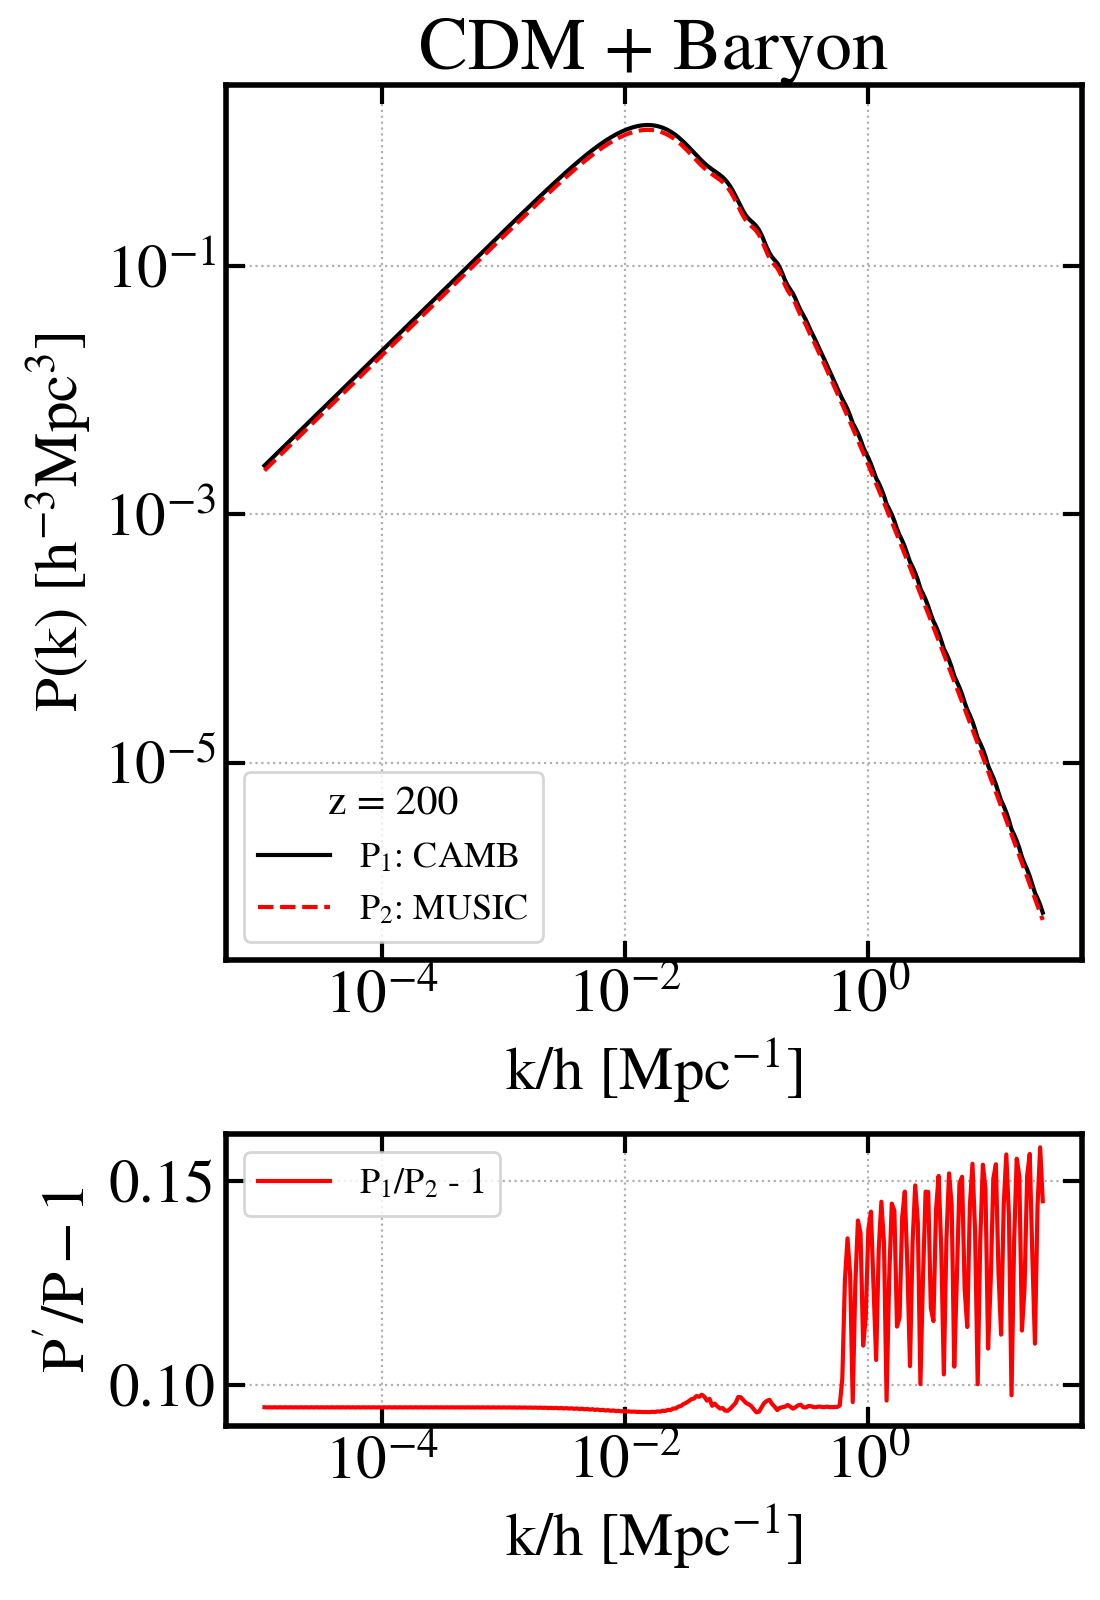

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(5.5, 8), gridspec_kw={'height_ratios': [3, 1]})

# x1 = camb_kh
# P1 = camb_Pt

x1 = music_kh
P1 = np.interp(music_kh, camb_kh, camb_Pt)

x2 = music_kh
P2 = music_Pt * 8*np.pi**3

ax[0].loglog(x1, P1, c='k', label=r"P$_{1}$: CAMB")
ax[0].loglog(x2, P2, c='r', ls="--", label=r'P$_{2}$: MUSIC')
# ax[0].loglog(kh, P3, c='b', ls=":", label=r'P$_{2}$: get_matter_power_spectrum')

ax[0].set_xlabel(r"k/h [Mpc$^{-1}$]")
ax[0].set_ylabel(r"P(k) [h$^{-3}$Mpc$^{3}$]") # checking the unit
ax[0].legend(title=f"z = {z[0]}", fontsize=13, title_fontsize=15)
ax[0].grid(ls=":")

ax[1].semilogx(x1, P1/P2 - 1, c='r', label=r"P$_1$/P$_2$ - 1")
# ax[1].set_ylim(0.09, 0.1)
ax[1].set_xlabel(r"k/h [Mpc$^{-1}$]")
ax[1].set_ylabel(r"$\rm P'/P - 1$")
ax[1].grid(ls=":")
ax[1].legend(ncols=2, fontsize=13, title_fontsize=15)

ax[0].set_title("CDM + Baryon")
plt.tight_layout(pad=0.3)